# demo

## 数据预处理Problem_C_Data_Wordle.xlsx
 1. 读取数据
 2. 数据清洗
 3. 数据分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. 读取数据

In [2]:
# 1.1 读取数据
df = pd.read_excel('Problem_C_Data_Wordle.xlsx')

In [3]:
# 将第一行作为列名
df.columns = df.iloc[0]
# 删除第一行
df = df.drop(0)
# 删除空列
df = df.dropna(axis=1, how='all')
# 重置索引
df = df.reset_index(drop=True)
# 1.2 查看数据
df.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27 00:00:00,556,condo,20879,2012,0,2,17,35,29,14,3


#### 2. 数据清洗

In [4]:
# 2.1 查看数据类型
df.dtypes

0
Date                           object
Contest number                 object
Word                           object
Number of  reported results    object
Number in hard mode            object
1 try                          object
2 tries                        object
3 tries                        object
4 tries                        object
5 tries                        object
6 tries                        object
7 or more tries (X)            object
dtype: object

In [5]:
# 2.2 查看数据缺失情况
df.isnull().sum()

0
Date                           0
Contest number                 0
Word                           0
Number of  reported results    0
Number in hard mode            0
1 try                          0
2 tries                        0
3 tries                        0
4 tries                        0
5 tries                        0
6 tries                        0
7 or more tries (X)            0
dtype: int64

In [6]:
# 2.3 查看数据分布情况
df.describe()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
count,359,359,359,359,359,359,359,359,359,359,359,359
unique,359,359,359,357,344,6,22,36,32,31,30,21
top,2022-12-31 00:00:00,560,manly,218595,10343,0,2,16,35,24,9,1
freq,1,1,1,2,2,221,56,19,38,32,30,146


#### 3. 数据分析

我们在下面可以看到字符不够五个问题

##### 分析Word列

In [7]:
df['Word'].value_counts()

manly    1
gamer    1
larva    1
forgo    1
story    1
        ..
inter    1
whoop    1
taunt    1
leery    1
slump    1
Name: Word, Length: 359, dtype: int64

In [8]:
# 查看Word的列的字符串长度
df['Word'].str.len().describe()

count    359.000000
mean       5.000000
std        0.105703
min        4.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        6.000000
Name: Word, dtype: float64

In [9]:
# 找出字符串长度不等于5的行
df[df['Word'].str.len() != 5]

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
15,2022-12-16 00:00:00,545,rprobe,22853,2160,0,6,24,32,24,11,3
35,2022-11-26 00:00:00,525,clen,26381,2424,1,17,36,31,12,3,0
246,2022-04-29 00:00:00,314,tash,106652,7001,2,19,34,27,13,4,1
353,2022-01-12 00:00:00,207,favor,137586,3073,1,4,15,26,29,21,4


##### 分析Number of reported results列

In [10]:
df['Number of  reported results'].describe()
# count 359 <-- 359个单词
# unique 357 <-- unique的意思是不重复的，这里359行中有2行重复了
# top 218595 <-- top的意思是出现频率最高的，这里出现频率最高的是218595
# freq 2 

count        359
unique       357
top       218595
freq           2
Name: Number of  reported results, dtype: int64

<AxesSubplot:xlabel='Date'>

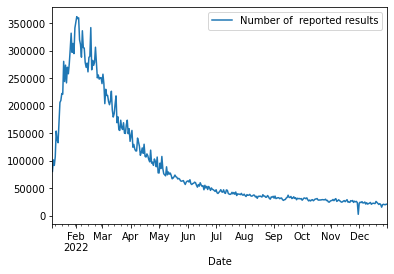

In [11]:
# 以时间为横坐标，Number of  reported results为纵坐标，画出折线图
df.plot(x='Date', y='Number of  reported results', kind='line')

上图中我们可以发现有一个异常值，我们需要去除，用样条插值法和埃尔米特插值法取平均值，代码如下：

<AxesSubplot:ylabel='Frequency'>

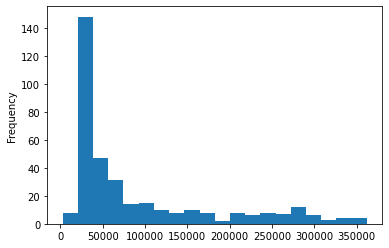

In [12]:
# 单独取出Number of  reported results列
df['Number of  reported results'].plot(kind='hist',bins=20)

In [49]:
df_Number_of_reported_results = df['Number of  reported results']

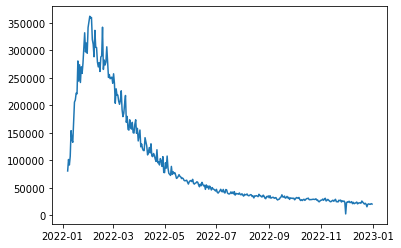

In [51]:
# 用plt画图，横坐标为df的Date列，纵坐标为df_Number_of_reported_results列
plt.plot(df['Date'], df_Number_of_reported_results)

In [13]:
print(df['Number of  reported results'].isnull().sum())

0


In [14]:
df_Number_of_reported_results[df_Number_of_reported_results<10000]

NameError: name 'df_Number_of_reported_results' is not defined

In [ ]:
error_index = df_Number_of_reported_results[df_Number_of_reported_results<10000].index

In [15]:
error_index

NameError: name 'error_index' is not defined

d:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'cubicspline' is not defined

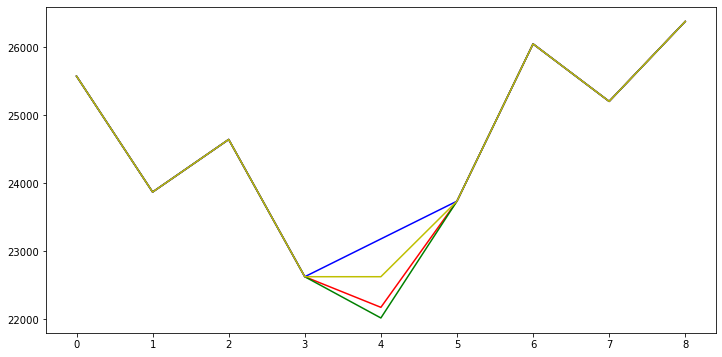

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.array([25577, 23873, 24646, 22628, np.nan, 23739, 26051, 25206, 26381])

spline = pd.Series(data).interpolate(method='spline', order=2) # 用2阶样条插值法填补缺失值
cubic = pd.Series(data).interpolate(method='cubic') # 用3阶样条插值法填补缺失值
linear = pd.Series(data).interpolate(method='linear') # 用线性插值法填补缺失值
nearest = pd.Series(data).interpolate(method='nearest') # 用最近邻插值法填补缺失值
krogh = pd.Series(data).interpolate(method='krogh') # 用Krogh插值法填补缺失值 krogh就是hermite插值法

plt.figure(figsize=(12, 6))
plt.plot(spline, 'r', label='spline')
plt.plot(cubic, 'g', label='cubic')
plt.plot(linear, 'b', label='linear')
plt.plot(nearest, 'y', label='nearest')
plt.plot(cubicspline, 'c', label='cubicspline')
plt.plot(krogh, 'm', label='krogh')
plt.plot(data, 'k', label='original')
plt.legend(loc='best')
plt.show()

In [72]:
# 我们采用spline和krogh的均值
df_Number_of_reported_results[error_index] = int((spline[4] + krogh[4])/2)

In [73]:
df_Number_of_reported_results[error_index]

31    21929
Name: Number of  reported results, dtype: object

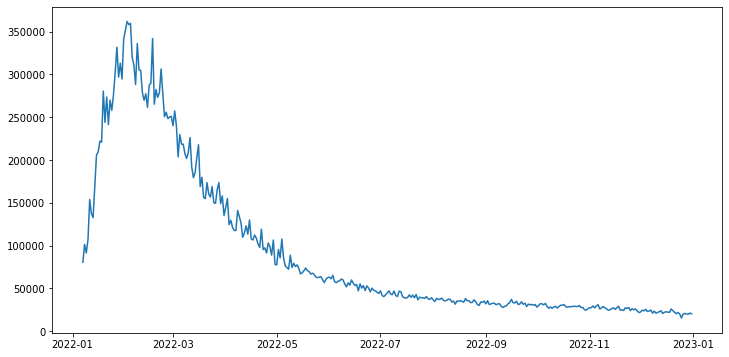

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df_Number_of_reported_results)

In [75]:
# 保存好数据修改的df_Number_of_reported_results
df_Number_of_reported_results.to_csv('df_Number_of_reported_results.csv', index=False)

下一节用lstm预测Number of reported results列